In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

## Prepare data

In [2]:
df_master = pd.read_csv('13-06-2022/master.csv')
df_master['branch'] = 'master'

df_new = pd.read_csv('13-06-2022/new-algorithm.csv')
df_new['branch'] = 'new-algorithm'

df = pd.concat([df_master, df_new], ignore_index = True)

## Normalize data

In [3]:
final_df = None

for name in set(df['name']):
    experiment_df = df[df['name'] == name]
    normalized_df = experiment_df.copy()
    
    cpu_time_max = experiment_df['cpu_time_us'].max()
    cpu_time_min = experiment_df['cpu_time_us'].min()
    normalized_df['cpu_time_us'] = (experiment_df['cpu_time_us'] - cpu_time_min) / (cpu_time_max - cpu_time_min)
    
    package_energy_max = experiment_df['package_energy'].max()
    package_energy_min = experiment_df['package_energy'].min()
    normalized_df['package_energy'] = (experiment_df['package_energy'] - package_energy_min) / (package_energy_max - package_energy_min)

    core_energy_max = experiment_df['core_energy'].max()
    core_energy_min = experiment_df['core_energy'].min()
    normalized_df['core_energy'] = (experiment_df['core_energy'] - core_energy_min) / (core_energy_max - core_energy_min)
    
    final_df = pd.concat([final_df, normalized_df], ignore_index = True)

df = final_df

## CPU time

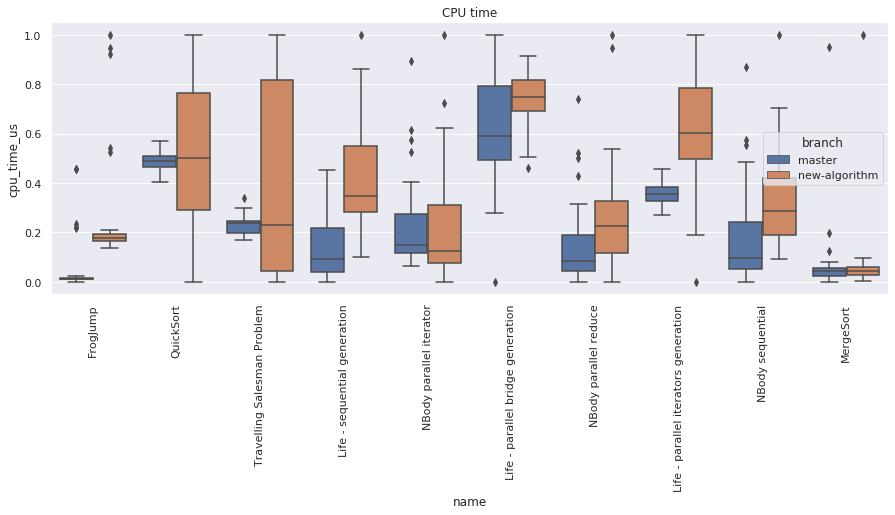

In [4]:
fig1, ax1 = plt.subplots(figsize=(15,5))
ax1.set_title('CPU time')
ax1.set_ylabel('Active time [us]')
ax1.set_xlabel('Algorithm')

sns.boxplot(x='name', y='cpu_time_us', hue='branch', data=df);
plt.xticks(rotation=90);

## Energy

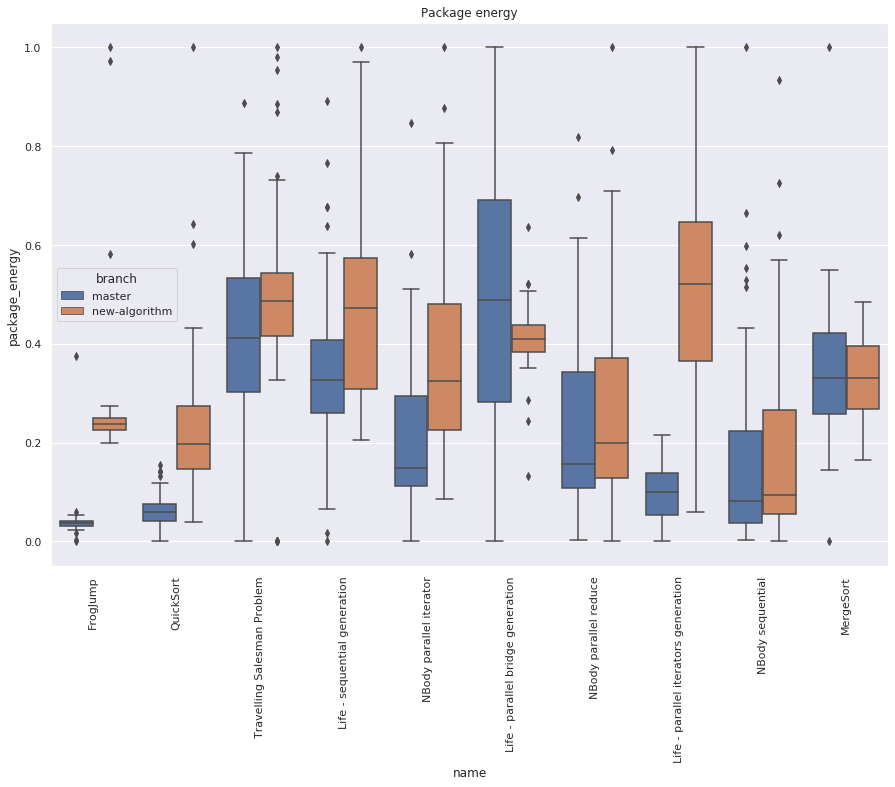

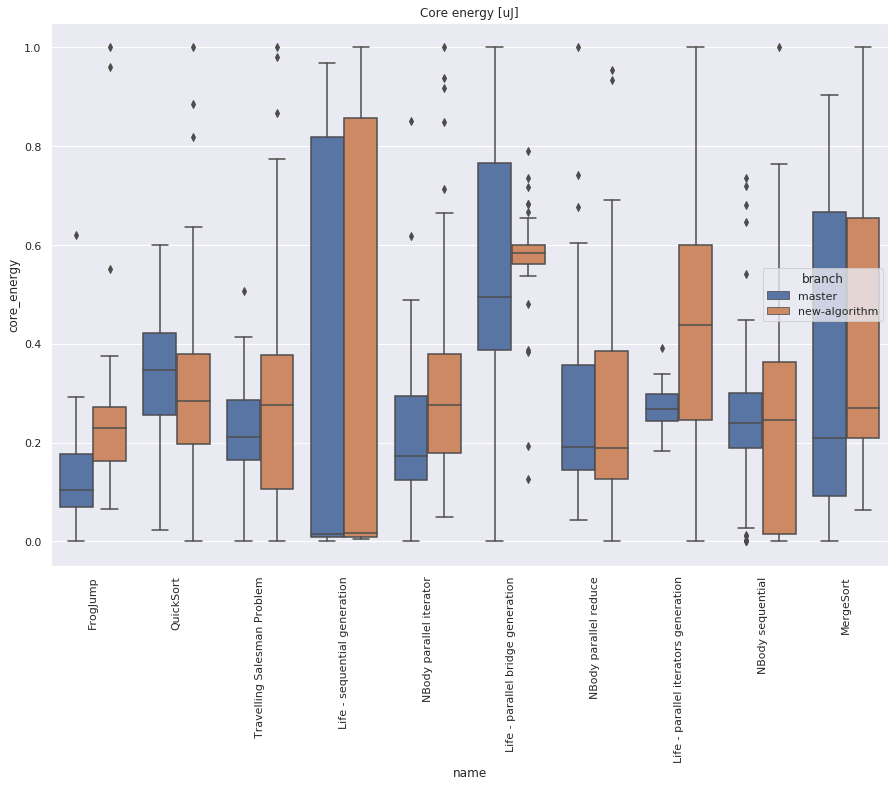

In [5]:
fig2, ax2 = plt.subplots(1, figsize=(15, 10));

ax2.set_title('Package energy')
ax2.set_ylabel('Energy [uJ]')
ax2.set_xlabel('Sleep duration [us]')
sns.boxplot(x='name', y='package_energy', hue='branch', data=df);
plt.xticks(rotation=90);

fig2, ax3 = plt.subplots(1, figsize=(15, 10));

ax3.set_title('Core energy [uJ]')
ax3.set_ylabel('Energy [uJ]')
ax3.set_xlabel('Sleep duration [us]')
sns.boxplot(x='name', y='core_energy', hue='branch', data=df);

plt.xticks(rotation=90);